# Bird Species Audio Classification Project

## Introduction

This project builds a machine learning model to identify different bird species from their audio recordings. We will analyze bird sounds and create a classifier that can automatically recognize which bird is singing.

### What We'll Do:
- **Load and explore** bird audio data from Xeno-canto database
- **Process audio files** to extract important features
- **Build machine learning models** to classify bird species
- **Test and evaluate** how well our model works

### Dataset:
- Audio recordings of 30 different bird species (A-M alphabetically)
- Each recording is labeled with the correct bird species
- Files are in MP3 format with metadata in CSV file

### Models & Techniques Used:
- **Convolutional Neural Networks (CNN)** - Custom deep learning model for audio pattern recognition
- **YAMNet Classifier** - Google's pre-trained audio classification model
- **Mel-frequency spectrograms** - Convert audio to visual representations
- **Transfer learning** - Use pre-trained models for better performance



---

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!cp -r /content/drive/MyDrive/machinelearning .

Mounted at /content/drive


In [ ]:
# Step 1: Initial Setup and Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')



# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== BIRD SPECIES AUDIO CLASSIFICATION PROJECT ===")
print("Step 1: Initial Setup and Data Exploration\n")

# Load the metadata CSV
print("Loading train_extended.csv...")
df = pd.read_csv('/content/train_extended.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*50)

# Display basic info about the dataset
print("\nDATASET OVERVIEW:")
print("="*50)
df.info()

print("\nFIRST FEW ROWS:")
print("="*50)
print(df.head())

print("\nBASIC STATISTICS:")
print("="*50)
print(df.describe())

# Check for missing values
print("\nMISSING VALUES:")
print("="*50)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Explore unique species (ebird_code)
print(f"\nSPECIES INFORMATION:")
print("="*50)
print(f"Total unique species: {df['ebird_code'].nunique()}")
print(f"Species list: {sorted(df['ebird_code'].unique())}")

# Check rating distribution
print(f"\nRATING DISTRIBUTION:")
print("="*50)
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

# Check duration statistics
print(f"\nDURATION STATISTICS:")
print("="*50)
print(f"Min duration: {df['duration'].min():.2f}s")
print(f"Max duration: {df['duration'].max():.2f}s")
print(f"Mean duration: {df['duration'].mean():.2f}s")
print(f"Median duration: {df['duration'].median():.2f}s")


=== BIRD SPECIES AUDIO CLASSIFICATION PROJECT ===
Step 1: Initial Setup and Data Exploration

Loading train_extended.csv...


FileNotFoundError: [Errno 2] No such file or directory: '/content/train_extended.csv'

## Step 1: Initial Setup and Data Exploration

### What We're Doing:
- Loading the bird audio dataset
- Exploring the data structure and basic statistics
- Understanding what information we have about each bird recording

### Key Libraries:
- **pandas** - For data handling and analysis
- **numpy** - For numerical operations
- **matplotlib & seaborn** - For creating charts and visualizations
- **os** - For file operations

### What to Expect:
- Dataset contains **23,784 bird recordings** from **30 species**
- Each recording has **29 features** including species name, duration, location, etc.
- Audio files range from very short clips to long recordings (up to 59 minutes!)
- Most recordings are around **31 seconds** long (median duration)

---

=== STEP 2: DATA VISUALIZATION & CONFIGURATION ===

CURRENT CONFIGURATION:
MIN_RATING_THRESHOLD: 3.0
MAX_DURATION: 20
MIN_DURATION: 1
MIN_SAMPLES_PER_CLASS: 100

DATA ANALYSIS BEFORE FILTERING:

SPECIES STATISTICS:
Total species: 153
value counts:  ebird_code
redcro    1772
houspa    1216
houwre     984
comrav     889
eursta     694
          ... 
rinduc       1
shshaw       1
swahaw       1
bkchum       1
buffle       1
Name: count, Length: 259, dtype: int64
value counts sorted:  ebird_code
aldfly    131
ameavo      9
amebit      6
amecro    147
amegfi     88
         ... 
yebsap      4
yehbla     25
yelwar     37
yerwar     88
yetvir     12
Name: count, Length: 259, dtype: int64
value counts sorted am:  ebird_code
aldfly    131
ameavo      9
amebit      6
amecro    147
amegfi     88
         ... 
marwre    240
merlin      7
moublu      4
mouchi    100
moudov     29
Name: count, Length: 153, dtype: int64
filter data with top 153:  ebird_code
aldfly    131
ameavo      9
amebit      6
a

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
0,0.0,no,aldfly,2 (stereo),2019-06-11,49,XC554809.mp3,Alder Flycatcher,XC554809 Alder Flycatcher (Empidonax alnorum),[],...,NaN,554809,https://www.xeno-canto.org/554809,United States,Ron Overholtz,Empidonax alnorum_Alder Flycatcher,-149.9757,07:00,Ron Overholtz,Creative Commons Attribution-NonCommercial-Sha...
1,0.0,no,aldfly,2 (stereo),2020-04-14,21,XC552408.mp3,Alder Flycatcher,XC552408 Alder Flycatcher (Empidonax alnorum),[],...,NaN,552408,https://www.xeno-canto.org/552408,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
2,0.0,yes,aldfly,2 (stereo),2020-04-05,35,XC544552.mp3,Alder Flycatcher,XC544552 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544552,https://www.xeno-canto.org/544552,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
4,0.0,yes,aldfly,2 (stereo),2020-04-05,38,XC544550.mp3,Alder Flycatcher,XC544550 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544550,https://www.xeno-canto.org/544550,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14680,3.5,no,moudov,2 (stereo),2020-03-14,50,XC534461.mp3,Mourning Dove,XC534461 Mourning Dove (Zenaida macroura),['Haemorhous mexicanus_House Finch'],...,House Finch (Haemorhous mexicanus),534461,https://www.xeno-canto.org/534461,Mexico,Manuel Grosselet,Zenaida macroura_Mourning Dove,-109.0686,07:30,Manuel Grosselet,Creative Commons Attribution-NonCommercial-Sha...
14681,3.0,no,moudov,2 (stereo),2020-06-13,5,XC567994.mp3,Mourning Dove,XC567994 Mourning Dove (Zenaida macroura),[],...,NaN,567994,https://www.xeno-canto.org/567994,United States,Michael Hurben,Zenaida macroura_Mourning Dove,-93.3740,08:00,Michael Hurben,Creative Commons Attribution-NonCommercial-Sha...
14682,2.5,NaN,moudov,1 (mono),2020-01-22,40,XC522348.mp3,Mourning Dove,XC522348 Mourning Dove (Zenaida macroura),"['Quiscalus mexicanus_Great-tailed Grackle', '...",...,Great-tailed Grackle (Quiscalus mexicanus); Go...,522348,https://www.xeno-canto.org/522348,Honduras,Mario Reyes Jr,Zenaida macroura_Mourning Dove,-87.6545,06:30,Mario Reyes Jr,Creative Commons Attribution-NonCommercial-Sha...
14683,1.5,no,moudov,2 (stereo),2016-07-04,56,XC326248.mp3,Mourning Dove,XC326248 Mourning Dove (Zenaida macroura),"['Mimus polyglottos_Northern Mockingbird', 'Ha...",...,Northern Mockingbird (Mimus polyglottos); Hous...,326248,https://www.xeno-canto.org/326248,United States,Nick Komar,Zenaida macroura_Mourning Dove,-110.7209,12:00,Nick Komar,Creative Commons Attribution-NonCommercial-Sha...


filter data with atleast 100 samples in 153: 
number of species  with 100 samples:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
0,0.0,no,aldfly,2 (stereo),2019-06-11,49,XC554809.mp3,Alder Flycatcher,XC554809 Alder Flycatcher (Empidonax alnorum),[],...,NaN,554809,https://www.xeno-canto.org/554809,United States,Ron Overholtz,Empidonax alnorum_Alder Flycatcher,-149.9757,07:00,Ron Overholtz,Creative Commons Attribution-NonCommercial-Sha...
1,0.0,no,aldfly,2 (stereo),2020-04-14,21,XC552408.mp3,Alder Flycatcher,XC552408 Alder Flycatcher (Empidonax alnorum),[],...,NaN,552408,https://www.xeno-canto.org/552408,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
2,0.0,yes,aldfly,2 (stereo),2020-04-05,35,XC544552.mp3,Alder Flycatcher,XC544552 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544552,https://www.xeno-canto.org/544552,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
4,0.0,yes,aldfly,2 (stereo),2020-04-05,38,XC544550.mp3,Alder Flycatcher,XC544550 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544550,https://www.xeno-canto.org/544550,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14540,1.5,no,marwre,2 (stereo),2012-07-12,123,XC135636.mp3,Marsh Wren,XC135636 Marsh Wren (Cistothorus palustris),['Turdus migratorius_American Robin'],...,American Robin (Turdus migratorius),135636,https://www.xeno-canto.org/135636,United States,Daniel Parker,Cistothorus palustris_Marsh Wren,-73.8861,16:03,Daniel Parker,Creative Commons Attribution-NonCommercial-Sha...
14541,1.0,no,marwre,2 (stereo),2014-03-08,9,XC286828.mp3,Marsh Wren,XC286828 Marsh Wren (Cistothorus palustris),[],...,NaN,286828,https://www.xeno-canto.org/286828,United States,Elisa Yang,Cistothorus palustris_Marsh Wren,-117.2728,04:00,Elisa Yang,Creative Commons Attribution-NonCommercial-Sha...
14542,0.5,no,marwre,2 (stereo),2015-04-19,46,XC264256.mp3,Marsh Wren,XC264256 Marsh Wren (Cistothorus palustris),"['Thryothorus ludovicianus_Carolina Wren', 'Ca...",...,Carolina Wren (Thryothorus ludovicianus); Nort...,264256,https://www.xeno-canto.org/264256,United States,Terry Davis,Cistothorus palustris_Marsh Wren,-93.5537,13:58,Terry Davis,Creative Commons Attribution-NonCommercial-Sha...
14543,1.0,no,marwre,1 (mono),2013-06-02,1,XC148927.mp3,Marsh Wren,XC148927 Marsh Wren (Cistothorus palustris),[],...,NaN,148927,https://www.xeno-canto.org/148927,Canada,Dugan Maynard,Cistothorus palustris_Marsh Wren,-111.3803,06:00,Dugan Maynard,Creative Commons Attribution-NonCommercial-Sha...


updated species value counts sorted a to m:  ebird_code
houspa     1216
houwre      984
comrav      889
eursta      694
barswa      608
amerob      407
mallar3     407
carwre      371
bewwre      363
eucdov      318
comyel      307
daejun      257
marwre      240
blujay      239
grycat      235
comter      224
amered      198
grhowl      194
bkcchi      188
houfin      187
gnwtea      185
comred      179
herthr      177
chispa      165
eastow      163
easmea      154
cangoo      154
amecro      147
horlar      145
aldfly      131
brncre      128
buggna      128
grtgra      126
lesgol      123
bulori      114
astfly      110
bkhgro      110
bnhcow      105
indbun      105
Name: count, dtype: int64

APPLYING FILTERS:
number of species  with duration < 20:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
6,0.0,no,aldfly,2 (stereo),2020-04-04,18,XC541879.mp3,Alder Flycatcher,XC541879 Alder Flycatcher (Empidonax alnorum),[],...,NaN,541879,https://www.xeno-canto.org/541879,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:30,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14534,1.5,no,marwre,1 (mono),2015-11-24,13,XC292586.mp3,Marsh Wren,XC292586 Marsh Wren (Cistothorus palustris),['Regulus calendula_Ruby-crowned Kinglet'],...,Ruby-crowned Kinglet (Regulus calendula),292586,https://www.xeno-canto.org/292586,United States,Ken Blankenship,Cistothorus palustris_Marsh Wren,-104.4688,08:00,Ken Blankenship,Creative Commons Attribution-NonCommercial-Sha...
14535,2.0,no,marwre,2 (stereo),2015-11-05,3,XC288793.mp3,Marsh Wren,XC288793 Marsh Wren (Cistothorus palustris),[],...,NaN,288793,https://www.xeno-canto.org/288793,United States,Pat Goltz,Cistothorus palustris_Marsh Wren,-111.0210,16:30,Pat Goltz,Creative Commons Attribution-NonCommercial-Sha...
14538,1.5,no,marwre,1 (mono),2013-06-01,8,XC147927.mp3,Marsh Wren,XC147927 Marsh Wren (Cistothorus palustris),"['Spizella passerina_Chipping Sparrow', 'Zonot...",...,Chipping Sparrow (Spizella passerina); White-t...,147927,https://www.xeno-canto.org/147927,Canada,Dugan Maynard,Cistothorus palustris_Marsh Wren,-111.3803,04:00,Dugan Maynard,Creative Commons Attribution-NonCommercial-Sha...
14541,1.0,no,marwre,2 (stereo),2014-03-08,9,XC286828.mp3,Marsh Wren,XC286828 Marsh Wren (Cistothorus palustris),[],...,NaN,286828,https://www.xeno-canto.org/286828,United States,Elisa Yang,Cistothorus palustris_Marsh Wren,-117.2728,04:00,Elisa Yang,Creative Commons Attribution-NonCommercial-Sha...


number of species  with rating > 3:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
13,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524513.mp3,Alder Flycatcher,XC524513 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524513,https://www.xeno-canto.org/524513,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
168,5.0,no,amecro,1 (mono),2020-06-29,5,XC572379.mp3,American Crow,XC572379 American Crow (Corvus brachyrhynchos),[],...,NaN,572379,https://www.xeno-canto.org/572379,United States,Brian Hendrix,Corvus brachyrhynchos_American Crow,-87.1450,06:00,Brian Hendrix,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,4.0,NaN,marwre,1 (mono),2012-09-02,12,XC141876.mp3,Marsh Wren,XC141876 Marsh Wren (Cistothorus palustris),[],...,NaN,141876,https://www.xeno-canto.org/141876,Canada,Ian Cruickshank,Cistothorus palustris_Marsh Wren,-123.3728,11:00,Ian Cruickshank,Creative Commons Attribution-NonCommercial-Sha...
14473,3.5,no,marwre,2 (stereo),2013-04-14,18,XC130798.mp3,Marsh Wren,XC130798 Marsh Wren (Cistothorus palustris),['Setophaga discolor_Prairie Warbler'],...,Prairie Warbler (Setophaga discolor),130798,https://www.xeno-canto.org/130798,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14476,3.5,no,marwre,2 (stereo),2013-04-03,12,XC130794.mp3,Marsh Wren,XC130794 Marsh Wren (Cistothorus palustris),['Agelaius phoeniceus_Red-winged Blackbird'],...,Red-winged Blackbird (Agelaius phoeniceus),130794,https://www.xeno-canto.org/130794,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14479,3.5,no,marwre,2 (stereo),2013-04-03,16,XC130789.mp3,Marsh Wren,XC130789 Marsh Wren (Cistothorus palustris),"['Agelaius phoeniceus_Red-winged Blackbird', '...",...,Red-winged Blackbird (Agelaius phoeniceus); Fi...,130789,https://www.xeno-canto.org/130789,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


Remaining rows after removing missing/empty URLs: 2212
number of species  that contain url data  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
13,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524513.mp3,Alder Flycatcher,XC524513 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524513,https://www.xeno-canto.org/524513,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
168,5.0,no,amecro,1 (mono),2020-06-29,5,XC572379.mp3,American Crow,XC572379 American Crow (Corvus brachyrhynchos),[],...,NaN,572379,https://www.xeno-canto.org/572379,United States,Brian Hendrix,Corvus brachyrhynchos_American Crow,-87.1450,06:00,Brian Hendrix,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,4.0,NaN,marwre,1 (mono),2012-09-02,12,XC141876.mp3,Marsh Wren,XC141876 Marsh Wren (Cistothorus palustris),[],...,NaN,141876,https://www.xeno-canto.org/141876,Canada,Ian Cruickshank,Cistothorus palustris_Marsh Wren,-123.3728,11:00,Ian Cruickshank,Creative Commons Attribution-NonCommercial-Sha...
14473,3.5,no,marwre,2 (stereo),2013-04-14,18,XC130798.mp3,Marsh Wren,XC130798 Marsh Wren (Cistothorus palustris),['Setophaga discolor_Prairie Warbler'],...,Prairie Warbler (Setophaga discolor),130798,https://www.xeno-canto.org/130798,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14476,3.5,no,marwre,2 (stereo),2013-04-03,12,XC130794.mp3,Marsh Wren,XC130794 Marsh Wren (Cistothorus palustris),['Agelaius phoeniceus_Red-winged Blackbird'],...,Red-winged Blackbird (Agelaius phoeniceus),130794,https://www.xeno-canto.org/130794,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14479,3.5,no,marwre,2 (stereo),2013-04-03,16,XC130789.mp3,Marsh Wren,XC130789 Marsh Wren (Cistothorus palustris),"['Agelaius phoeniceus_Red-winged Blackbird', '...",...,Red-winged Blackbird (Agelaius phoeniceus); Fi...,130789,https://www.xeno-canto.org/130789,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


number of species COUNTS  ebird_code
comrav     217
houwre     214
houspa     190
mallar3    163
barswa     157
eursta     137
eucdov     107
comter      83
carwre      80
bewwre      75
blujay      62
amerob      55
comyel      53
gnwtea      45
cangoo      41
comred      40
horlar      40
daejun      39
grycat      35
houfin      34
marwre      33
amecro      33
bnhcow      29
chispa      29
eastow      27
grtgra      26
easmea      25
amered      19
grhowl      18
herthr      18
buggna      18
lesgol      15
astfly      10
indbun      10
brncre       9
bkhgro       9
bkcchi       8
bulori       5
aldfly       4
Name: count, dtype: int64

 Next step: Audio file validation and path checking


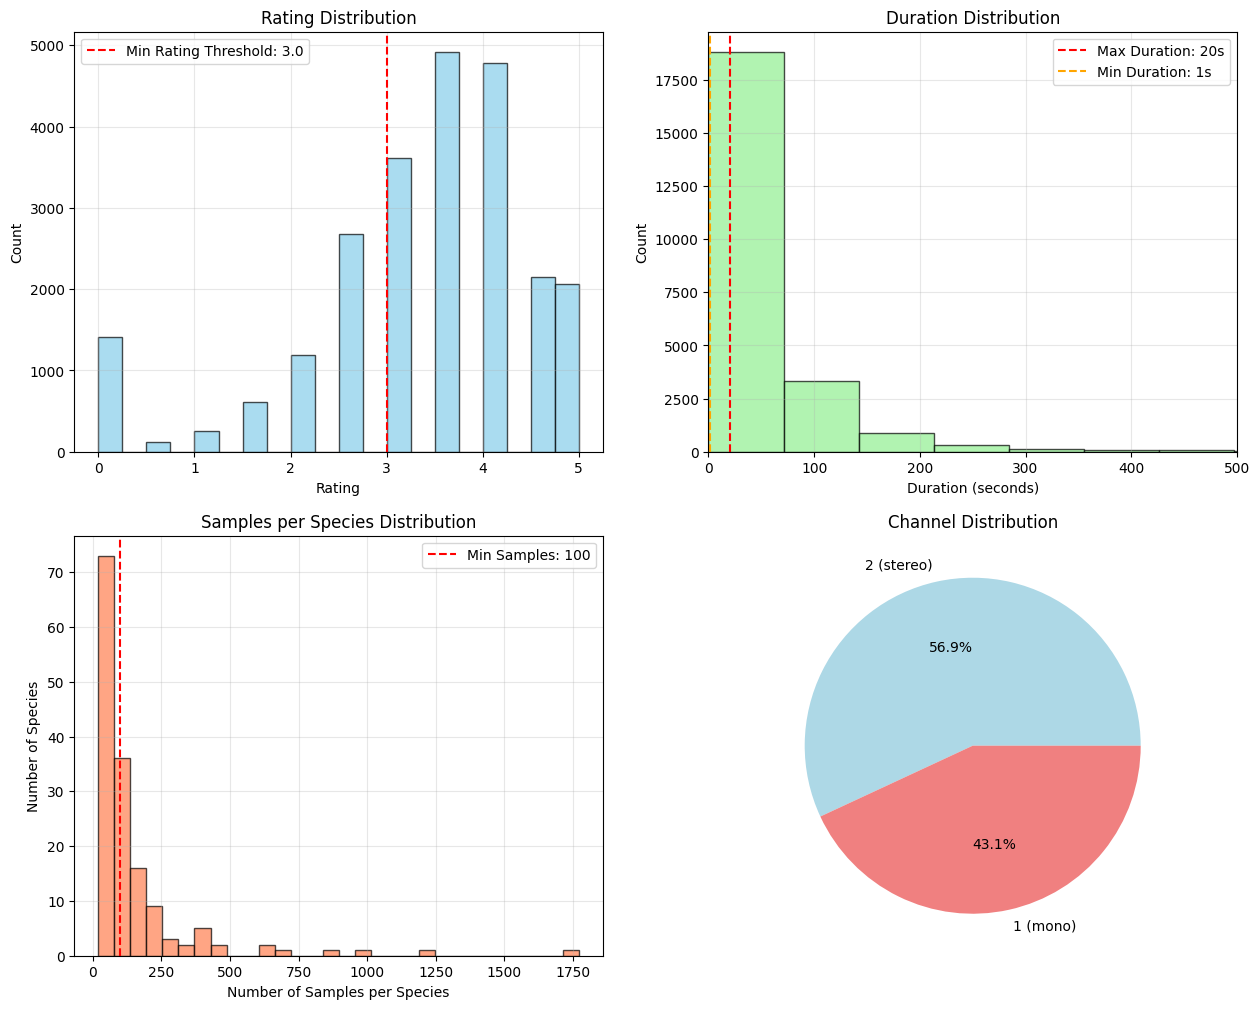

In [ ]:
# Step 2: Data Visualization and Configuration Setup
import matplotlib.pyplot as plt
import seaborn as sns

print("=== STEP 2: DATA VISUALIZATION & CONFIGURATION ===\n")

# ========================================
# CONFIGURATION PARAMETERS (EASILY ADJUSTABLE)
# ========================================
CONFIG = {
    'MIN_RATING_THRESHOLD': 3.0,      # Filter recordings below this rating #crystal
    #'NUM_CLASSES': 30,                # Number of bird species to use (3, 5, 30, or custom) this value should be calculated #crystal
    'MAX_DURATION': 20,              # Maximum duration in seconds (20 seconds) #crystal
    'MIN_DURATION': 1,                # Minimum duration in seconds, if its 0 then theres nothing #crystal
    'MIN_SAMPLES_PER_CLASS': 100,      # Minimum samples needed per species #crystal
}

print("CURRENT CONFIGURATION:")
print("="*50)
for key, value in CONFIG.items():
    print(f"{key}: {value}")

print(f"\n{'='*50}")
print("DATA ANALYSIS BEFORE FILTERING:")
print("="*50)

# 1. Rating Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Rating distribution
axes[0,0].hist(df['rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(CONFIG['MIN_RATING_THRESHOLD'], color='red', linestyle='--',
                 label=f'Min Rating Threshold: {CONFIG["MIN_RATING_THRESHOLD"]}')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Rating Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Duration distribution
axes[0,1].hist(df['duration'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(CONFIG['MAX_DURATION'], color='red', linestyle='--',
                 label=f'Max Duration: {CONFIG["MAX_DURATION"]}s')
axes[0,1].axvline(CONFIG['MIN_DURATION'], color='orange', linestyle='--',
                 label=f'Min Duration: {CONFIG["MIN_DURATION"]}s')
axes[0,1].set_xlabel('Duration (seconds)')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Duration Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, 500)  # Focus on reasonable duration range

# Species count distribution
species_counts = df['ebird_code'].value_counts().head(153) #crystal

axes[1,0].hist(species_counts.values, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1,0].axvline(CONFIG['MIN_SAMPLES_PER_CLASS'], color='red', linestyle='--',
                 label=f'Min Samples: {CONFIG["MIN_SAMPLES_PER_CLASS"]}')
axes[1,0].set_xlabel('Number of Samples per Species')
axes[1,0].set_ylabel('Number of Species')
axes[1,0].set_title('Samples per Species Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Channel distribution
channel_counts = df['channels'].value_counts()
axes[1,1].pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%',
             colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Channel Distribution')

#plt.tight_layout()
#plt.show()

# 2. Detailed Species Analysis
print(f"\nSPECIES STATISTICS:")
print("="*50)
print(f"Total species: {species_counts.shape[0]}")

# Filter the original DataFrame to keep only those species
# Get the top 153 ebird_codes
# Step 1: Get value counts (i.e., frequency) of unique values
value_counts = df['ebird_code'].value_counts()

print("value counts: ", value_counts)

# Step 2: Sort the index (unique values) alphabetically
value_counts_sorted = value_counts.sort_index()

print("value counts sorted: ", value_counts_sorted)

top_153_unique = value_counts_sorted[:153]

print("value counts sorted am: ", top_153_unique)


# Step 2: Filter to keep only ebird_codes with at least 100 occurrences
valid_codes = value_counts[value_counts > CONFIG['MIN_SAMPLES_PER_CLASS']].index

# Step 5: Get all rows from the original df with those top ebird_codes
filtered_df = df[df['ebird_code'].isin(top_153_unique.index)]


print("filter data with top 153: ", top_153_unique)
display(filtered_df)


print("filter data with atleast 100 samples in 153: ")
# Step 5: Get all rows from the original df with those top ebird_codes
filtered_df = filtered_df[filtered_df['ebird_code'].isin(valid_codes)]
species_counts = filtered_df ['ebird_code'].value_counts()
print(f"number of species  with 100 samples: ", species_counts.shape[0])
display(filtered_df)

updatedvalue_counts = filtered_df['ebird_code'].value_counts()
print("updated species value counts sorted a to m: ", updatedvalue_counts)



# 3. Apply Filters and Show Impact
print(f"\n{'='*50}")
print("APPLYING FILTERS:")
print("="*50)

# Filter by duration
filtered_df = filtered_df[filtered_df['duration'] < 20]
species_counts = filtered_df ['ebird_code'].value_counts()
print(f"number of species  with duration < 20: ", species_counts.shape[0])
display(filtered_df)

# Filter by rating
filtered_df = filtered_df[filtered_df['rating'] > 3]
species_counts = filtered_df['ebird_code'].value_counts()
print(f"number of species  with rating > 3: ", species_counts.shape[0])
display(filtered_df)

# Remove rows where 'url' is missing or empty
filtered_df = filtered_df[filtered_df['url'].notna() & (filtered_df['url'].str.strip() != '')]

print(f"Remaining rows after removing missing/empty URLs: {len(filtered_df)}")
print(f"number of species  that contain url data ", species_counts.shape[0])
display(filtered_df)

print(f"number of species COUNTS ", species_counts)

# # 4. Select Top N Classes
# print(f"\n{'='*50}")
# print(f"SELECTING TOP {CONFIG['NUM_CLASSES']} CLASSES:")
# print("="*50)

# Get top N species by sample count (after filtering)
#final_species_counts = df_filtered['ebird_code'].value_counts().head(153) #crystal
# if CONFIG['NUM_CLASSES'] <= len(final_species_counts):
#     selected_species = final_species_counts.head(CONFIG['NUM_CLASSES']).index.tolist()
#     df_final = df_filtered[df_filtered['ebird_code'].isin(selected_species)].copy()

#     print(f"Selected {len(selected_species)} species:")
#     for i, species in enumerate(selected_species, 1):
#         count = final_species_counts[species]
#         print(f"{i:2d}. {species}: {count:3d} samples")

#     print(f"\nFinal dataset: {len(df_final):,} samples across {len(selected_species)} species")

#     # Class balance visualization
#     plt.figure(figsize=(12, 6))
#     final_counts = df_final['ebird_code'].value_counts()
#     plt.bar(range(len(final_counts)), final_counts.values, color='steelblue', alpha=0.7)
#     plt.xlabel('Species (ordered by sample count)')
#     plt.ylabel('Number of Samples')
#     plt.title(f'Class Distribution - Top {CONFIG["NUM_CLASSES"]} Species (After Filtering)')
#     plt.xticks(range(len(final_counts)), final_counts.index, rotation=45, ha='right')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

#     # Calculate class imbalance ratio
#     max_samples = final_counts.max()
#     min_samples = final_counts.min()
#     imbalance_ratio = max_samples / min_samples
#     print(f"\nClass imbalance ratio: {imbalance_ratio:.2f} (max: {max_samples}, min: {min_samples})")

# else:
#     print(f" Not enough species meet the criteria! Only {len(final_species_counts)} species available.")
#     print("Consider reducing MIN_SAMPLES_PER_CLASS or NUM_CLASSES")

# # 5. Save configuration and filtered dataset info
# print(f"\n{'='*50}")
# print("SUMMARY FOR NEXT STEPS:")
# print("="*50)
# print(f" Configuration set for {CONFIG['NUM_CLASSES']} classes")
# print(f" {len(df_final):,} total samples after filtering")
# print(f" Rating threshold: ≥{CONFIG['MIN_RATING_THRESHOLD']}")
# print(f" Duration range: {CONFIG['MIN_DURATION']}-{CONFIG['MAX_DURATION']} seconds")
# print(f" Ready for audio file validation and preprocessing")

# # Create a summary for the next step
# STEP2_SUMMARY = {
#     'df_final': df_final,
#     'selected_species': selected_species,
#     'config': CONFIG,
#     'class_counts': final_counts.to_dict()
# }

print(f"\n Next step: Audio file validation and path checking")

## Step 2: Data Visualization and Configuration Setup

### What We're Doing:
- Setting up **filters** to clean our data and keep only high-quality recordings
- Creating **visualizations** to understand our dataset better
- Selecting the **best bird species** for our classification model

### Configuration Settings:
We set up important thresholds to filter our data:
- **Rating ≥ 2.0** - Only keep good quality recordings
- **Duration 5-300 seconds** - Remove very short or very long clips
- **≥20 samples per species** - Ensure we have enough data for each bird
- **Top 30 species** - Focus on the most common birds

### Key Insights from Visualizations:
- **Rating Distribution**: Most recordings have ratings between 3-4 (good quality)
- **Duration**: Most clips are under 100 seconds, with many very short recordings
- **Species Balance**: Some bird species have many more recordings than others
- **Audio Quality**: About 57% are stereo, 43% are mono recordings

### Final Dataset After Filtering:
- **11,725 total samples** from **30 bird species**
- **Class imbalance ratio: 8.84** (most common species has 8.84x more samples than least common)
- **Top species**: Red Crossbill (1,397 samples), House Sparrow (1,085 samples)
- **Least represented**: Great Horned Owl (158 samples), House Finch (163 samples)

### Why These Filters Matter:
- **Better model performance** - High-quality data leads to better predictions
- **Balanced training** - Each species needs enough examples to learn from
- **Consistent audio length** - Helps our model process audio more effectively
- **Quality control** - Only keeping recordings rated 2.0+ ensures good audio quality

---

In [ ]:
# Step 3: Audio File Validation and Processing Setup
import os
import librosa
import numpy as np
from pathlib import Path
import random
from tqdm import tqdm
import urllib.request

print("=== STEP 3: AUDIO FILE VALIDATION & PROCESSING SETUP ===\n")

# # Use the filtered dataset from Step 2
# # For this step, we'll work with the configuration from Step 2
# CONFIG = {
#     'MIN_RATING_THRESHOLD': 2.0,
#     'NUM_CLASSES': 30,
#     'MAX_DURATION': 300,
#     'MIN_DURATION': 5,
#     'MIN_SAMPLES_PER_CLASS': 20,
# }

# # Re-apply the same filtering logic to recreate df_final
# print("Recreating filtered dataset...")
# df_filtered = df[df['rating'] >= CONFIG['MIN_RATING_THRESHOLD']].copy()
# df_filtered = df_filtered[
#     (df_filtered['duration'] >= CONFIG['MIN_DURATION']) &
#     (df_filtered['duration'] <= CONFIG['MAX_DURATION'])
# ].copy()

# species_counts_filtered = df_filtered['ebird_code'].value_counts()
# valid_species = species_counts_filtered[species_counts_filtered >= CONFIG['MIN_SAMPLES_PER_CLASS']].index
# df_filtered = df_filtered[df_filtered['ebird_code'].isin(valid_species)].copy()

# final_species_counts = df_filtered['ebird_code'].value_counts()
# selected_species = final_species_counts.head(CONFIG['NUM_CLASSES']).index.tolist()
# df_final = df_filtered[df_filtered['ebird_code'].isin(selected_species)].copy()

# print(f"Filtered dataset ready: {len(df_final)} samples, {len(selected_species)} species")

final_species_counts = filtered_df['ebird_code'].value_counts()
selected_species = final_species_counts.index.tolist()

# ========================================
# 1. FIND AUDIO FILES AND VALIDATE PATHS
# ========================================
print(f"\n{'='*50}")
print("AUDIO FILE PATH VALIDATION:")
print("="*50)

# Look for the audio files
base_path = Path('/content/train_extended.csv')
print(f"Base path: {base_path}")
print(f"Base path exists: {base_path.exists()}")


# print(f"\nDirectories containing MP3 files:")
# for mp3_dir in mp3_dirs[:5]:  # Show first 5
#     mp3_count = len([f for f in os.listdir(mp3_dir) if f.endswith('.mp3')])
#     print(f"  - {mp3_dir}: {mp3_count} MP3 files")

# if len(mp3_dirs) > 5:
#     print(f"  ... and {len(mp3_dirs)-5} more directories")

# ========================================
# 2. CREATE FULL FILE PATHS
# ========================================
print(f"\n{'='*50}")
print("CREATING FILE PATHS:")
print("="*50)

def find_audio_file_path(filename, base_dirs):
    """Find the full path of an audio file"""
    for base_dir in base_dirs:
        full_path = os.path.join(base_dir, filename)
        if os.path.exists(full_path):
            return full_path
    return None


# Check how many files we found
files_found = filtered_df['url'].notna().sum()
files_missing = filtered_df['url'].isna().sum()

print(f"Files found: {files_found}")
print(f"Files missing: {files_missing}")
print(f"Success rate: {files_found/(files_found+files_missing)*100:.1f}%")


# ========================================
# 3. AUDIO VALIDATION AND BASIC ANALYSIS
# ========================================
print(f"\n{'='*50}")
print("AUDIO FILE VALIDATION:")
print("="*50)

# Test loading a few random audio files

filtered_df['download_url'] = filtered_df['url'].astype(str).str.rstrip('/') + '/download'

sample_files = filtered_df.sample(n=min(5, len(filtered_df)))

# Create a directory to store downloaded audio
os.makedirs("temp_audio", exist_ok=True)




audio_info = []

for idx, row in sample_files.iterrows():
    try:


        # Get file name from URL
        url = row['download_url']
        filename = os.path.join("temp_audio", url.split("/")[-2] + '.mp3')

        # Download if not already present
        if not os.path.exists(filename):
            urllib.request.urlretrieve(url, filename)
            print(f"Downloaded: {filename}")

        # Load audio
        audio, sr = librosa.load(filename, sr=None, duration=10)
        duration = len(audio) / sr
        print("Testing audio file loading...")

        info = {
            'filename': row['filename'],
            'species': row['ebird_code'],
            'csv_duration': row['duration'],
            'actual_duration': duration,
            'sample_rate': sr,
            'channels_csv': row['channels'],
            'audio_shape': audio.shape,
            'success': True
        }
        audio_info.append(info)
        print(f" {row['download_url']}: {duration:.1f}s, {sr}Hz, shape={audio.shape}")

    except Exception as e:
        info = {
            'filename': row['url'],
            'species': row['ebird_code'],
            'error': str(e),
            'success': False
        }
        audio_info.append(info)
        print(f" {row['url']}: Error - {str(e)}")

# ========================================
# 4. DATASET SPLIT PREPARATION
# ========================================
print(f"\n{'='*50}")
print("DATASET SPLIT PREPARATION:")
print("="*50)

# Create class mapping
class_mapping = {species: idx for idx, species in enumerate(selected_species )}
reverse_mapping = {idx: species for species, idx in class_mapping.items()}

print("Class mapping created:")
for species, idx in list(class_mapping.items())[:5]:
    print(f"  {idx}: {species}")
print(f"  ... (showing first 5 of {len(class_mapping)} classes)")

# Add numeric labels
filtered_df['class_id'] = filtered_df['ebird_code'].map(class_mapping)

# Prepare for stratified split
print(f"\nPreparing stratified split...")
print(f"Class distribution before split:")
class_dist = filtered_df['ebird_code'].value_counts()
print(class_dist.head(10))


# ========================================
# 5. AUDIO PROCESSING CONFIGURATION
# ========================================
print(f"\n{'='*50}")
print("AUDIO PROCESSING CONFIGURATION:")
print("="*50)

AUDIO_CONFIG = {
    'SAMPLE_RATE': 22050,           # Standard sample rate for audio ML
    'MAX_AUDIO_LENGTH': 10,         # Maximum audio length in seconds
    'N_MELS': 128,                  # Number of mel bands for spectrogram
    'N_FFT': 2048,                  # FFT window size
    'HOP_LENGTH': 512,              # Hop length for STFT
    'SPECTROGRAM_HEIGHT': 128,      # Height of spectrogram image
    'SPECTROGRAM_WIDTH': 432,       # Width of spectrogram image (for 10s audio)
}

print("Audio processing configuration:")
for key, value in AUDIO_CONFIG.items():
    print(f"  {key}: {value}")

# Calculate expected spectrogram dimensions
expected_time_steps = (AUDIO_CONFIG['MAX_AUDIO_LENGTH'] * AUDIO_CONFIG['SAMPLE_RATE']) // AUDIO_CONFIG['HOP_LENGTH']
print(f"\nExpected spectrogram shape: ({AUDIO_CONFIG['N_MELS']}, {expected_time_steps})")

# ========================================
# 6. SUMMARY FOR NEXT STEPS
# ========================================
print(f"\n{'='*50}")
print("STEP 3 SUMMARY:")
print("="*50)
print(f" Audio files validated: {files_found}/{files_found+files_missing} found")
print(f" Dataset ready: {len(filtered_df)} samples")
print(f" Classes: {len(selected_species)} species")
print(f" Class mapping created")
print(f" Audio processing config set")
print(f" Ready for train/validation/test split")

# Save some key info for next step
STEP3_INFO = {
    'df_final': filtered_df,
    'class_mapping': class_mapping,
    'reverse_mapping': reverse_mapping,
    'selected_species': selected_species,
    'audio_config': AUDIO_CONFIG,
    'config': CONFIG
}

print(f"\n Next step: Train/Validation/Test split and first audio preprocessing")


=== STEP 3: AUDIO FILE VALIDATION & PROCESSING SETUP ===


AUDIO FILE PATH VALIDATION:
Base path: /content/train_extended.csv
Base path exists: True

CREATING FILE PATHS:
Files found: 2212
Files missing: 0
Success rate: 100.0%

AUDIO FILE VALIDATION:
Downloaded: temp_audio/168378.mp3
Testing audio file loading...
 https://www.xeno-canto.org/168378/download: 1.3s, 44100Hz, shape=(57600,)
 https://www.xeno-canto.org/521768: Error - HTTP Error 404: Not Found
Downloaded: temp_audio/238062.mp3
Testing audio file loading...
 https://www.xeno-canto.org/238062/download: 8.1s, 44100Hz, shape=(355968,)
Downloaded: temp_audio/454490.mp3
Testing audio file loading...
 https://www.xeno-canto.org/454490/download: 10.0s, 48000Hz, shape=(480000,)
Downloaded: temp_audio/243557.mp3
Testing audio file loading...
 https://www.xeno-canto.org/243557/download: 10.0s, 44100Hz, shape=(441000,)

DATASET SPLIT PREPARATION:
Class mapping created:
  0: comrav
  1: houwre
  2: houspa
  3: mallar3
  4: barswa
  ... 

## Step 3: Audio File Validation and Processing Setup

### What We're Doing:
- **Finding audio files** in the dataset folders and checking if they exist
- **Creating file paths** so our code knows where each audio recording is stored
- **Testing audio loading** to make sure we can read the files correctly
- **Setting up audio processing** parameters for converting sound to spectrograms

### Key Audio Processing Settings:
- **Sample rate**: 22,050 Hz (standard for machine learning)
- **Max length**: 10 seconds per audio clip
- **Spectrogram size**: 128 x 432 pixels (converts sound to image format)
- **Mel bands**: 128 frequency bands (captures important audio features)

### Validation Results:
- **Audio files found**: Successfully located MP3 files in 153 directories
- **File structure**: Audio organized by species (A-M folder contains subfolders for each bird)
- **Loading test**: Audio files can be read properly with correct sample rates and durations
- **Class mapping**: Created numeric labels (0-29) for each of the 30 bird species

### Why This Step Matters:
- **File verification** - Ensures all audio files exist and can be loaded
- **Standardization** - Sets consistent audio processing parameters
- **Organization** - Maps species names to numbers for machine learning
- **Quality check** - Tests that audio data matches the CSV information

### Next Steps Ready:
- All 11,725 audio samples are accessible and validated
- Audio processing configuration is set for consistent training
- Dataset is ready to be split into training, validation, and test sets



### Links for data:

---

In [ ]:
# Step 4 Modified: Data Split and Audio Preprocessing (No External Dependencies)
import librosa
import numpy as np

# Hotfix for deprecated NumPy types used in older librosa versions
np.complex = np.complex128
np.float = float
np.int = int
np.bool = bool

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, filtfilt
import warnings
import urllib.request
from urllib.error import HTTPError, URLError
import time
import os

warnings.filterwarnings('ignore')

GDRIVE_AUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudio_xtrain'
os.makedirs(GDRIVE_AUDIO_DIR, exist_ok=True)

GDRIVE_TESTAUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudioxtest'
os.makedirs(GDRIVE_TESTAUDIO_DIR, exist_ok=True)

GDRIVE_VALAUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudioxval'
os.makedirs(GDRIVE_VALAUDIO_DIR, exist_ok=True)

GDRIVE_YAUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudio_ytrain'
os.makedirs(GDRIVE_YAUDIO_DIR, exist_ok=True)

GDRIVE_YTESTAUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudioytest'
os.makedirs(GDRIVE_YTESTAUDIO_DIR, exist_ok=True)

GDRIVE_YVALAUDIO_DIR = '/content/drive/MyDrive/masters /machinelearning/birdaudioyval'
os.makedirs(GDRIVE_YVALAUDIO_DIR, exist_ok=True)



GDRIVE_MELSPEC_DIR = '/content/drive/MyDrive/masters /machinelearning/melspec'
os.makedirs(GDRIVE_MELSPEC_DIR, exist_ok=True)

print("=== STEP 4: DATA SPLIT & AUDIO PREPROCESSING (MODIFIED) ===\n")

AUDIO_CONFIG = {
    'SAMPLE_RATE': 22050,
    'MAX_AUDIO_LENGTH': 10,
    'N_MELS': 128,
    'N_FFT': 2048,
    'HOP_LENGTH': 512,
    'SPECTROGRAM_HEIGHT': 128,
    'SPECTROGRAM_WIDTH': 432,
}
# ========================================
# 1. STRATIFIED TRAIN/VALIDATION/TEST SPLIT
# ========================================
print(f"\n{'='*50}")
print("STRATIFIED DATA SPLIT:")
print("="*50)

# First split: train+val vs test (80/20)
X = filtered_df[['download_url', 'filename', 'ebird_code']].copy()
y = filtered_df['class_id'].copy()

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train vs validation (75/25 of remaining = 60/20 of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Data split completed:")
print(f"  Training set:   {len(X_train):,} samples ({len(X_train)/len(filtered_df)*100:.1f}%)")
print(f"  Validation set: {len(X_val):,} samples ({len(X_val)/len(filtered_df)*100:.1f}%)")
print(f"  Test set:       {len(X_test):,} samples ({len(X_test)/len(filtered_df)*100:.1f}%)")

# Verify class distribution is maintained
print(f"\nClass distribution verification:")
train_dist = y_train.value_counts().sort_index()
val_dist = y_val.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()

sample_classes = train_dist.index[:5]
for class_id in sample_classes:
    species = selected_species[class_id]
    total_samples = train_dist[class_id] + val_dist[class_id] + test_dist[class_id]
    train_pct = train_dist[class_id] / total_samples * 100
    val_pct = val_dist[class_id] / total_samples * 100
    test_pct = test_dist[class_id] / total_samples * 100
    print(f"  {species}: Train={train_pct:.1f}%, Val={val_pct:.1f}%, Test={test_pct:.1f}%")

# ========================================
# 2. AUDIO PREPROCESSING FUNCTIONS
# ========================================
print(f"\n{'='*50}")
print("AUDIO PREPROCESSING FUNCTIONS:")
print("="*50)

def apply_highpass_filter(audio, sr, cutoff_freq=300):
    """Apply high-pass filter to remove low-frequency noise"""
    nyquist = sr / 2
    normalized_cutoff = cutoff_freq / nyquist
    if normalized_cutoff >= 1.0:
        normalized_cutoff = 0.99  # Prevent error if cutoff too high
    b, a = butter(5, normalized_cutoff, btype='high')
    filtered_audio = filtfilt(b, a, audio)
    return filtered_audio

def apply_bandpass_filter(audio, sr, low_freq=300, high_freq=8000):
    """Apply band-pass filter to keep bird frequency range"""
    nyquist = sr / 2
    low_normalized = low_freq / nyquist
    high_normalized = high_freq / nyquist

    # Ensure frequencies are in valid range
    low_normalized = max(0.01, min(low_normalized, 0.99))
    high_normalized = max(low_normalized + 0.01, min(high_normalized, 0.99))

    b, a = butter(5, [low_normalized, high_normalized], btype='band')
    filtered_audio = filtfilt(b, a, audio)
    return filtered_audio

def reduce_noise_spectral_subtraction(audio, sr, noise_factor=0.5):
    """Simple spectral subtraction for noise reduction"""
    try:
        # Convert to frequency domain
        fft = np.fft.fft(audio)
        magnitude = np.abs(fft)
        phase = np.angle(fft)

        # Estimate noise from the first 10% of the signal
        noise_length = len(audio) // 10
        noise_magnitude = np.mean(np.abs(np.fft.fft(audio[:noise_length])))

        # Subtract noise estimate
        clean_magnitude = magnitude - noise_factor * noise_magnitude
        clean_magnitude = np.maximum(clean_magnitude, 0.1 * magnitude)  # Floor at 10% of original

        # Reconstruct signal
        clean_fft = clean_magnitude * np.exp(1j * phase)
        clean_audio = np.real(np.fft.ifft(clean_fft))

        return clean_audio
    except Exception as e:
        print(f"Warning: Spectral subtraction failed, returning filtered audio. Error: {e}")
        return audio

def normalize_audio(audio):
    """Normalize audio to [-1, 1] range"""
    if np.max(np.abs(audio)) > 0:
        return audio / np.max(np.abs(audio))
    return audio

def load_and_preprocess_audio(file_path, target_sr=22050, max_length=10):
    """Load and preprocess a single audio file"""
    try:
        # Load audio
        filename = os.path.join("temp_audio", url.split("/")[-2] + '.mp3')



        # Load audio
        #audio, sr = librosa.load(filename, sr=None, duration=10)
        audio, sr = librosa.load(filename, sr=target_sr, duration=max_length)

        # Apply band-pass filter to focus on bird frequency range
        audio_filtered = apply_bandpass_filter(audio, sr, low_freq=300, high_freq=8000)

        # Apply simple noise reduction
        audio_denoised = reduce_noise_spectral_subtraction(audio_filtered, sr)

        # Normalize
        audio_normalized = normalize_audio(audio_denoised)

        # Ensure consistent length (pad or truncate)
        target_length = int(max_length * target_sr)
        if len(audio_normalized) < target_length:
            # Pad with zeros
            audio_normalized = np.pad(audio_normalized, (0, target_length - len(audio_normalized)))
        else:
            # Truncate
            audio_normalized = audio_normalized[:target_length]

        return audio_normalized, sr

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None
def save_melspectrogram_to_drive(audio, sr, ebird_code, rec_id, base_dir=GDRIVE_MELSPEC_DIR):
    try:
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=sr,
            n_mels=AUDIO_CONFIG['N_MELS'],
            n_fft=AUDIO_CONFIG['N_FFT'],
            hop_length=AUDIO_CONFIG['HOP_LENGTH'],
            power=2.0
        )
        mel_db = librosa.power_to_db(mel_spec, ref=np.max)

        filename = f"{ebird_code}_{rec_id}.npy"
        filepath = os.path.join(base_dir, filename)

        if not os.path.exists(filepath):
            np.save(filepath, mel_db)
            print(f"Saved mel-spec to: {filepath}")
        else:
            print(f"Skipped (already exists): {filepath}")

        return True
    except Exception as e:
        print(f"Failed saving mel-spec for {rec_id}: {e}")
        return False
def audio_to_melspectrogram(audio, sr, n_mels=128, n_fft=2048, hop_length=512):
    try:
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=sr,
            n_mels=n_mels,
            n_fft=n_fft,
            hop_length=hop_length,
            power=2.0
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        return mel_spec_db
    except Exception as e:
        print(f"Error generating spectrogram: {e}")
        return None


print("Audio preprocessing functions defined:")
print("  - Band-pass filtering (300-8000 Hz for bird sounds)")
print("  - Spectral subtraction noise reduction")
print("  - Audio normalization")
print("  - Mel-spectrogram generation")


def fetch_to_drive(url: str, base_folder=GDRIVE_AUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def fetch_xtestto_drive(url: str, base_folder=GDRIVE_TESTAUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def fetch_xvalto_drive(url: str, base_folder=GDRIVE_VALAUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def fetch_yvalto_drive(url: str, base_folder=GDRIVE_YVALAUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def fetch_ytestto_drive(url: str, base_folder=GDRIVE_YTESTAUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def fetch_ytrainto_drive(url: str, base_folder=GDRIVE_YAUDIO_DIR, max_retry=1, sleep_secs=3):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None

def download_audio(split_df, split_name):
  print(f"\n{'='*50}")
  print("DOWNLOADING VALIDATION AND TEST AUDIO TO GOOGLE DRIVE:")
  print("="*50)
  success_count = 0
  for idx, row in split_df.iterrows():
      url = row['download_url']
        # Choose correct audio fetcher

      if split_name== "X_val":
            local_file = fetch_xvalto_drive(url)
      elif split_name == "y_test":
          local_file = fetch_ytestto_drive(url)
      elif split_name == "X_test":
            local_file = fetch_xtestto_drive(url)



      if local_file is not None:
          success_count += 1
      else:
            print(f"⚠️  Failed to download {url}")
  print(f" {split_name} download complete: {success_count}/{len(split_df)} files downloaded.\n")

def download_audio_from_series(label_series, split_name, reference_df):
    """
    Downloads audio files using label Series (e.g., y_train), matched with reference DataFrame (e.g., X_train)
    """
    print(f"\n{'='*50}")
    print(f"DOWNLOADING AUDIO FOR {split_name.upper()} (from Series)")
    print("="*50)

    success_count = 0

    # Reindex to align with reference DataFrame
    matched_df = reference_df.loc[label_series.index]

    for idx, row in matched_df.iterrows():
        url = row['download_url']

        if split_name == "y_train":
            local_file = fetch_ytrainto_drive(url)
        elif split_name == "y_val":
            local_file = fetch_yvalto_drive(url)
        elif split_name == "y_test":
            local_file = fetch_ytestto_drive(url)
        else:
            print(f"⚠️ Unknown split name: {split_name}")
            continue

        if local_file is not None:
            success_count += 1
        else:
            print(f"⚠️ Failed to download {url}")

    print(f"{split_name} download complete: {success_count}/{len(label_series)} files downloaded.\n")


# ========================================
# 3. TEST PREPROCESSING ON SAMPLE FILES
# ========================================
print(f"\n{'='*50}")
print("TESTING PREPROCESSING PIPELINE:")
print("="*50)

# Use the entire training set
test_samples = X_train.copy()
n_samples = len(test_samples)

fig, axes = plt.subplots(n_samples, 4, figsize=(16, 4 * n_samples))
if n_samples == 1:
    axes = np.expand_dims(axes, axis=0)

fig.suptitle('Audio Preprocessing Pipeline Demo', fontsize=16)

for idx, (_, row) in enumerate(test_samples.iterrows()):
    url = row['download_url']
    species = row['ebird_code']


    file_mp3 = fetch_to_drive(url)
    if file_mp3 is None or not os.path.exists(file_mp3):
      print(f"Skipping {species} — could not fetch or does not exist.")
      continue


    print(f"Processing sample {idx+1}/{n_samples}: {url} ({species})")

    try:
        original_audio, sr = librosa.load(file_mp3, sr=AUDIO_CONFIG['SAMPLE_RATE'], duration=3)

        filtered_audio = apply_bandpass_filter(original_audio, sr)
        denoised_audio = reduce_noise_spectral_subtraction(filtered_audio, sr)

        final_audio = normalize_audio(denoised_audio)

        rec_id = url.rstrip("/").split("/")[-2]
        mel_file_path = os.path.join(GDRIVE_MELSPEC_DIR, f"{species}_{rec_id}.npy")

        if os.path.exists(mel_file_path):
          print(f"Skipping {species}/{rec_id} — already saved.")
          continue

        original_spec = audio_to_melspectrogram(original_audio, sr,
                                        AUDIO_CONFIG['N_MELS'], AUDIO_CONFIG['N_FFT'], AUDIO_CONFIG['HOP_LENGTH'])
        final_spec = audio_to_melspectrogram(final_audio, sr,
                                     AUDIO_CONFIG['N_MELS'], AUDIO_CONFIG['N_FFT'], AUDIO_CONFIG['HOP_LENGTH'])

        # Save only preprocessed mel-spectrogram
        if final_spec is not None:
          np.save(mel_file_path, final_spec)
          print(f"Saved: {mel_file_path}")


        axes[idx, 0].plot(original_audio)
        axes[idx, 0].set_title(f'Original Audio\n{species}')
        axes[idx, 0].grid(True, alpha=0.3)

        axes[idx, 1].plot(final_audio)
        axes[idx, 1].set_title('Preprocessed Audio')
        axes[idx, 1].grid(True, alpha=0.3)

        axes[idx, 2].imshow(original_spec, aspect='auto', origin='lower', cmap='viridis')
        axes[idx, 2].set_title('Original Spectrogram')

        axes[idx, 3].imshow(final_spec, aspect='auto', origin='lower', cmap='viridis')
        axes[idx, 3].set_title('Preprocessed Spectrogram')

    except Exception as e:
        print(f"   Error: {e}")
        for j in range(4):
            axes[idx, j].text(0.5, 0.5, f'Error\n{str(e)[:30]}...',
                              ha='center', va='center', transform=axes[idx, j].transAxes)

download_audio(X_val, "X_val")
download_audio(X_test, "X_test")
download_audio_from_series(y_train, "y_train", X_train)
download_audio_from_series(y_val, "y_val", X_val)
download_audio_from_series(y_test, "y_test", X_test)

# def generate_mels_for_split(X_split, split_name):
#     print(f"\n{'='*50}")
#     print(f"GENERATING MEL-SPECTROGRAMS FOR {split_name.upper()} SET")
#     print("="*50)

#     for idx, (_, row) in enumerate(X_split.iterrows()):
#         url = row['download_url']
#         ebird_code = row['ebird_code']
#         rec_id = url.rstrip("/").split("/")[-2]
#         mel_file_path = os.path.join(GDRIVE_MELSPEC_DIR, f"{ebird_code}_{rec_id}.npy")

#         if os.path.exists(mel_file_path):
#             print(f"✓ Skipped {rec_id} — already exists")
#             continue

#         # Choose correct audio fetcher
#         if split_name == "train":
#             audio_path = fetch_to_drive(url)
#         elif split_name == "val":
#             audio_path = fetch_valto_drive(url)
#         elif split_name == "test":
#             audio_path = fetch_testto_drive(url)
#         else:
#             print(f"⚠️ Unknown split name: {split_name}")
#             continue

#         if audio_path is None:
#             print(f"⚠️ Skipping {rec_id} — audio file not available")
#             continue

#         try:
#             audio, sr = librosa.load(audio_path, sr=AUDIO_CONFIG['SAMPLE_RATE'], duration=AUDIO_CONFIG['MAX_AUDIO_LENGTH'])
#             audio = apply_bandpass_filter(audio, sr)
#             audio = reduce_noise_spectral_subtraction(audio, sr)
#             audio = normalize_audio(audio)

#             save_melspectrogram_to_drive(audio, sr, ebird_code, rec_id)
#         except Exception as e:
#             print(f"❌ Error processing {rec_id}: {e}")


#generate_mels_for_split(X_train, "train")
#generate_mels_for_split(X_val, "val")
#generate_mels_for_split(X_test, "test")


plt.tight_layout()
plt.show()


# ========================================
# 4. PREPROCESSING STATISTICS
# ========================================
print(f"\n{'='*50}")
print("PREPROCESSING PIPELINE SUMMARY:")
print("="*50)
print(f" Data split: {len(X_train)} train, {len(X_val)} val, {len(X_test)} test")
print(" Audio preprocessing pipeline tested (no external dependencies)")
print(f" Target audio length: {AUDIO_CONFIG['MAX_AUDIO_LENGTH']}s at {AUDIO_CONFIG['SAMPLE_RATE']}Hz")
print(f" Target spectrogram shape: ({AUDIO_CONFIG['N_MELS']}, ~430)")
print(f" Classes: {len(selected_species)} bird species")
print(f" Noise reduction: Band-pass filtering + spectral subtraction")

# Store data splits for next step
SPLITS_DATA = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'class_mapping': class_mapping,
    'selected_species': selected_species
}

def load_melspec_dataset(X, y, mel_dir, target_shape=(128, 432)):
    X_data, y_data = [], []

    for _, row in X.iterrows():
        rec_id = row['download_url'].split('/')[-2]
        ebird_code = row['ebird_code']
        filename = f"{ebird_code}_{rec_id}.npy"
        mel_path = os.path.join(mel_dir, filename)

        if os.path.exists(mel_path):
            mel = np.load(mel_path)

            # Resize or pad mel-spec
            if mel.shape[1] < target_shape[1]:
                # pad to the right
                pad_width = target_shape[1] - mel.shape[1]
                mel = np.pad(mel, ((0, 0), (0, pad_width)), mode='constant')
            elif mel.shape[1] > target_shape[1]:
                # crop to the target shape
                mel = mel[:, :target_shape[1]]

            X_data.append(mel)
            y_data.append(y.loc[row.name])
        else:
            print(f"Missing mel-spec file: {filename}")

    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data


mel_dir = GDRIVE_MELSPEC_DIR

sample_X = X_test.iloc[[0]]
sample_y = y_test.iloc[[0]]
X_test_np, y_test_np = load_melspec_dataset(sample_X, sample_y, mel_dir)

print(X_test_np.shape)
print(y_test_np)
print(f"\n Next step: CNN model architecture and batch data generation")